In [1]:
# Import Core library
import sys
import re, numpy as np, pandas as pd, matplotlib.pyplot as plt, nltk
import emoji
from pprint import pprint
from cleantext import clean

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [2]:
import wordcloud

In [3]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt

In [4]:
# NLTK Stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
# stop_words.extend(['RT','rt','FAV','fav','VIA','via'])

[nltk_data] Downloading package stopwords to C:\Users\Ivory-
[nltk_data]     UALR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Import Dataset
df = pd.read_excel('Community306_raw.xlsx')

In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'source_id', 'created_at', 'geo_source',
       'truncated', 'text', 'text_sentiment', 'text_toxicity', 'lang', 'user',
       'Community', 'retweet_count', 'favorite_count', 'quote_count',
       'reply_count', 'retweet_id_str', 'is_quote_status',
       'quoted_status_id_str', 'in_reply_to_status_id_str',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'entities',
       'possibly_sensitive', 'coordinates', 'place'],
      dtype='object')

In [7]:
df['create_year'] = pd.to_datetime(df.created_at, format='%d/%m/%Y', errors='coerce')
df['year'] = pd.to_datetime(df.created_at).dt.strftime('%Y')
df['month'] = pd.to_datetime(df.created_at).dt.strftime('%m')

In [8]:
start_date = "01/09/2020"
end_date = "15/12/2020"
after_start_date = df['create_year'] > start_date
before_end_date = df['create_year'] < end_date
between_two_dates = after_start_date & before_end_date

stream_one = df.loc[between_two_dates]

In [ ]:
stream_one.head()

In [24]:
# Convert to list
data = stream_one['text'].values.tolist()

# Make characters lowercase
data = [word.lower() for word in data]

In [22]:
data[:20]

['what bafoon no wonder why there ratings are in the tank ! might as well name the network el jazeer! msnbc is just the media wing of the socialist democrat pay !',
 'secure the voting process or lose the america we know and love.',
 'you need to be working on securing the voting process!',
 '',
 'like',
 'please secure the voting process. are being allowed to get drivers licenses and will use them to vote.',
 '',
 'the voting process has not been secured. don forget what happened in fl, ga, ca etc.... which results flipping once they know how many votes are needed. harvesting those votes',
 's anyone surprised that nadler & schiff alone with the rest of the democrats, would lie, cheat & try regain power !they have trying to undermine/impeach this president  minutes after his inauguration? ? washington post "the impeachment has begun !',
 'ot if but when ... : the know theyve lost if they can manufacture millions of votes before nov rd.',
 "'ve seen voter fraud, 've stopped identity fr

In [11]:
def get_url_patern():
    return re.compile(
        r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))'
        r'[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9]\.[^\s]{2,})')

def get_hashtags_pattern():
    return re.compile(r'#\w*')

def get_single_letter_words_pattern():
    return re.compile(r'(?<![\w\-])\w(?![\w\-])')

def get_blank_spaces_pattern():
    return re.compile(r'\s{2,}|\t')

def get_twitter_reserved_words_pattern():
    return re.compile(r'(RT|rt|FAV|fav|VIA|via)')

def get_mentions_pattern():
    return re.compile(r'@\w*')

def process_text(word):
  word=re.sub(pattern=get_url_patern(), repl='', string=word)
  word=re.sub(pattern=get_mentions_pattern(), repl='', string=word)
  word=re.sub(pattern=get_hashtags_pattern(), repl='', string=word)
  word=re.sub(pattern=get_twitter_reserved_words_pattern(), repl='', string=word)
  word=re.sub(pattern=get_single_letter_words_pattern(), repl='', string=word)
  word=re.sub(pattern=get_blank_spaces_pattern(), repl=' ', string=word)
  word=re.sub('\s+', ' ', word)
  word=re.sub("\'", "", word)
  word=re.sub(r'http\S+', '', word)  # remove http links
  word=re.sub(r'bit.ly/\S+', '', word)  # rempve bitly links
  word=word.strip('[link]')  # remove [links]
  word=re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', word)  # remove retweet
  word=re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', word)  # remove tweeted at
  word=clean(word, no_emoji=True)
  word =re.sub(r'\d+', '', word)
  word = word.strip()
  return word

<>:28: DeprecationWarning: invalid escape sequence \s
<>:33: DeprecationWarning: invalid escape sequence \s
<>:28: DeprecationWarning: invalid escape sequence \s
<>:33: DeprecationWarning: invalid escape sequence \s
C:\Users\IVORY-~1\AppData\Local\Temp/ipykernel_2316/2930402903.py:28: DeprecationWarning: invalid escape sequence \s
  word=re.sub('\s+', ' ', word)
C:\Users\IVORY-~1\AppData\Local\Temp/ipykernel_2316/2930402903.py:33: DeprecationWarning: invalid escape sequence \s
  word=re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', word)  # remove retweet


In [12]:
data = [process_text(word) for word in data]

C:\Users\Ivory-UALR\AppData\Local\Programs\Python\Python39\lib\site-packages\cleantext\clean.py:58: DeprecationWarning: invalid escape sequence '\ '
  text = text.encode("latin", "backslashreplace").decode("unicode-escape")
C:\Users\Ivory-UALR\AppData\Local\Programs\Python\Python39\lib\site-packages\cleantext\clean.py:58: DeprecationWarning: invalid escape sequence '\ '
  text = text.encode("latin", "backslashreplace").decode("unicode-escape")
C:\Users\Ivory-UALR\AppData\Local\Programs\Python\Python39\lib\site-packages\cleantext\clean.py:58: DeprecationWarning: invalid escape sequence '\('
  text = text.encode("latin", "backslashreplace").decode("unicode-escape")
C:\Users\Ivory-UALR\AppData\Local\Programs\Python\Python39\lib\site-packages\cleantext\clean.py:58: DeprecationWarning: invalid escape sequence '\+'
  text = text.encode("latin", "backslashreplace").decode("unicode-escape")
C:\Users\Ivory-UALR\AppData\Local\Programs\Python\Python39\lib\site-packages\cleantext\clean.py:58: Depr

In [17]:
data

['what bafoon no wonder why there ratings are in the tank ! might as well name the network el jazeer! msnbc is just the media wing of the socialist democrat pay !',
 'secure the voting process or lose the america we know and love.',
 'you need to be working on securing the voting process!',
 '',
 'like',
 'please secure the voting process. are being allowed to get drivers licenses and will use them to vote.',
 '',
 'the voting process has not been secured. don forget what happened in fl, ga, ca etc.... which results flipping once they know how many votes are needed. harvesting those votes',
 's anyone surprised that nadler & schiff alone with the rest of the democrats, would lie, cheat & try regain power !they have trying to undermine/impeach this president  minutes after his inauguration? ? washington post "the impeachment has begun !',
 'ot if but when ... : the know theyve lost if they can manufacture millions of votes before nov rd.',
 "'ve seen voter fraud, 've stopped identity fr

In [15]:
def getUniqueItems(iterable):
    result = []
    for item in iterable:
        if item not in result:
            result.append(item)
    return result

In [16]:
unique_items = getUniqueItems(data)

In [14]:
unique_items[:5]

NameError: name 'unique_items' is not defined

In [18]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(unique_items))

print(data_words[:10])

[['what', 'bafoon', 'no', 'wonder', 'why', 'there', 'ratings', 'are', 'in', 'the', 'tank', 'might', 'as', 'well', 'name', 'the', 'network', 'el', 'jazeer', 'msnbc', 'is', 'just', 'the', 'media', 'wing', 'of', 'the', 'socialist', 'democrat', 'pay'], ['secure', 'the', 'voting', 'process', 'or', 'lose', 'the', 'america', 'we', 'know', 'and', 'love'], ['you', 'need', 'to', 'be', 'working', 'on', 'securing', 'the', 'voting', 'process'], [], ['like'], ['please', 'secure', 'the', 'voting', 'process', 'are', 'being', 'allowed', 'to', 'get', 'drivers', 'licenses', 'and', 'will', 'use', 'them', 'to', 'vote'], ['the', 'voting', 'process', 'has', 'not', 'been', 'secured', 'don', 'forget', 'what', 'happened', 'in', 'fl', 'ga', 'ca', 'etc', 'which', 'results', 'flipping', 'once', 'they', 'know', 'how', 'many', 'votes', 'are', 'needed', 'harvesting', 'those', 'votes'], ['anyone', 'surprised', 'that', 'nadler', 'schiff', 'alone', 'with', 'the', 'rest', 'of', 'the', 'democrats', 'would', 'lie', 'cheat'

In [19]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['what', 'bafoon', 'no', 'wonder', 'why', 'there', 'ratings', 'are', 'in', 'the', 'tank', 'might', 'as', 'well', 'name', 'the', 'network', 'el', 'jazeer', 'msnbc', 'is', 'just', 'the', 'media', 'wing', 'of', 'the', 'socialist', 'democrat', 'pay']


In [20]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [21]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
nlp.max_length = 40000000

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['bafoon', 'wonder', 'rating', 'tank', 'well', 'name', 'network', 'wing', 'socialist', 'pay']]


In [22]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:10])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)], [(10, 1), (11, 1), (12, 1), (13, 1), (14, 1)], [(12, 1), (13, 1), (14, 1), (15, 1), (16, 1)], [], [], [(12, 1), (13, 1), (14, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)], [(10, 1), (12, 1), (13, 1), (14, 1), (15, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)], [(31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 2), (46, 1)], [(10, 1), (11, 1), (22, 1), (47, 1), (48, 1), (49, 1), (50, 1)], [(15, 1), (16, 1), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1)]]


In [23]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [24]:
topics_df = pd.DataFrame()

In [25]:
topics_df['topic_distributions'] = pd.Series(lda_model.get_document_topics(corpus[:10]))

In [26]:
topic_distributions_df = pd.DataFrame(lda_model.get_document_topics(corpus[:10]))

In [27]:
topic_distributions_df.head()

,0,1,2,3,4,5,6,7,8,9
0,"(0, 0.0943973)","(1, 0.10500043)","(2, 0.07452324)","(3, 0.07604035)","(4, 0.18050088)","(5, 0.10887599)","(6, 0.07393583)","(7, 0.12114752)","(8, 0.06824138)","(9, 0.097337075)"
1,"(0, 0.13995036)","(1, 0.07473783)","(2, 0.080226086)","(3, 0.10102834)","(4, 0.117739275)","(5, 0.13637796)","(6, 0.079593785)","(7, 0.13042252)","(8, 0.07346331)","(9, 0.06646052)"
2,"(0, 0.15912019)","(1, 0.07473775)","(2, 0.08022599)","(3, 0.081860065)","(4, 0.09857051)","(5, 0.13637781)","(6, 0.07959369)","(7, 0.14959031)","(8, 0.07346323)","(9, 0.066460446)"
3,"(0, 0.112393826)","(1, 0.0826592)","(2, 0.08872914)","(3, 0.09053641)","(4, 0.109018)","(5, 0.12963359)","(6, 0.088029824)","(7, 0.14424582)","(8, 0.081249595)","(9, 0.07350458)"
4,"(0, 0.112393826)","(1, 0.0826592)","(2, 0.08872914)","(3, 0.09053641)","(4, 0.109018)","(5, 0.12963359)","(6, 0.088029824)","(7, 0.14424582)","(8, 0.081249595)","(9, 0.07350458)"


In [60]:
for index, topic in lda_model.show_topics(formatted=False, num_words= 10):
    words = []
    words.append(w[0] for w in topic)
    topic_distributions_df.columns = [w[0] for w in topic]
    
topic_distributions_df.columns = words

ValueError: Length mismatch: Expected axis has 10 elements, new values have 1 elements

In [59]:
# pd.DataFrame(lda_model.get_document_topics(corpus))

In [61]:
# pprint(lda_model.print_topics(num_topics=3))
for index, topic in lda_model.show_topics(formatted=False, num_words= 4):
    words = [w[0] for w in topic]
    topic_distributions_df = ["".join(topic[:4]) for topic in words]
    print('Topic: {} \nWords: {}'.format(index, words))
    # print(topic_distributions_df)

Topic: 0 
Words: ['election', 'steal', 'need', 'stand']
Topic: 1 
Words: ['people', 'never', 'rally', 'american']
Topic: 2 
Words: ['think', 'keep', 'evidence', 'happen']
Topic: 3 
Words: ['state', 'trump', 'stop', 'lose']
Topic: 4 
Words: ['get', 'know', 'want', 'biden']
Topic: 5 
Words: ['vote', 'make', 'dominion', 'ballot']
Topic: 6 
Words: ['go', 'take', 'see', 'back']
Topic: 7 
Words: ['fraud', 'say', 'voter', 'thank']
Topic: 8 
Words: ['country', 'time', 'right', 'way']
Topic: 9 
Words: ['fight', 'let', 'watch', 'cheat']


In [62]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\Ivory-UALR\AppData\Local\Programs\Python\Python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.440294  0.002096       1        1  14.403475
5      0.024218  0.055438       2        1  13.164959
0     -0.072333  0.416164       3        1  11.197257
4     -0.071655 -0.163604       4        1  10.895415
3     -0.077226 -0.045803       5        1   9.025161
2     -0.034836 -0.073378       6        1   8.858532
6     -0.059355 -0.065014       7        1   8.789217
1     -0.045795 -0.032631       8        1   8.261233
8     -0.043045 -0.055368       9        1   8.083368
9     -0.060266 -0.037900      10        1   7.321385, topic_info=             Term          Freq         Total Category  logprob  loglift
53       election  14145.000000  14145.000000  Default  30.0000  30.0000
22           vote   9440.000000   9440.000000  Default  29.0000  29.0000
79         people   5727.000000   5727.000000  Default  28.0000  28.0000
19            get   5650.000000   5650.000000  Default  27.0000  27.0000
211            go   4897.000000   4897.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
1415        least    363.995693    364.909431  Topic10  -4.7161   2.6119
83        confirm    345.668471    346.582266  Topic10  -4.7677   2.6117
468   supreme_cou    344.540225    345.453940  Topic10  -4.7710   2.6117
910          feel    336.637312    337.551028  Topic10  -4.7942   2.6117
295          deep    327.419198    328.332936  Topic10  -4.8220   2.6116

[330 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
675       3  0.998541  absolutely
928       6  0.999134         act
130       9  0.998932      action
420       1  0.999033    actually
91        4  0.997615       agree
...     ...       ...         ...
342       9  0.999325       world
984       5  0.998045       write
396      10  0.998870       wrong
148       4  0.999481        year
1038      5  0.997277         yet

[300 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 6, 1, 5, 4, 3, 7, 2, 9, 10])

In [63]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.1805,"get, know, want, biden, pay, thing, well, stil...",what bafoon no wonder why there ratings are in...
1,1,0.0,0.1400,"election, steal, need, stand, good, try, great...",secure the voting process or lose the america ...
2,2,0.0,0.1591,"election, steal, need, stand, good, try, great...",you need to be working on securing the voting ...
3,3,7.0,0.1442,"fraud, say, voter, thank, day, patriot, even, ...",
4,4,7.0,0.1442,"fraud, say, voter, thank, day, patriot, even, ...",like
5,5,5.0,0.1799,"vote, make, dominion, ballot, president, give,...",please secure the voting process. are being al...
6,6,2.0,0.1827,"think, keep, evidence, happen, result, many, h...",
7,7,5.0,0.2307,"vote, make, dominion, ballot, president, give,...",the voting process has not been secured. don f...
8,8,7.0,0.1439,"fraud, say, voter, thank, day, patriot, even, ...",s anyone surprised that nadler & schiff alone ...
9,9,7.0,0.2420,"fraud, say, voter, thank, day, patriot, even, ...",ot if but when ... : the know theyve lost if t...


In [64]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.2610,"election, steal, need, stand, good, try, great...",
1,1.0,0.2309,"people, never, rally, american, call, tell, tr...",not one suppoer of can stay home in november! ...
2,2.0,0.2054,"think, keep, evidence, happen, result, many, h...",ale click on link to register!
3,3.0,0.3064,"state, trump, stop, lose, elector, look, law, ...","the media doesn' decide elections. enjoy the ""..."
4,4.0,0.2477,"get, know, want, biden, pay, thing, well, stil...",
5,5.0,0.2738,"vote, make, dominion, ballot, president, give,...",
6,6.0,0.2019,"go, take, see, back, come, win, use, video, ma...",:
7,7.0,0.2966,"fraud, say, voter, thank, day, patriot, even, ...","will never accept ""rigged"" presidential electi..."
8,8.0,0.3246,"country, time, right, way, corrupt, news, hope...",this is the judge in georgia that' helping bid...
9,9.0,0.2038,"fight, let, watch, cheat, join, help, military...",: tell us what you are seeing. repo case: call...


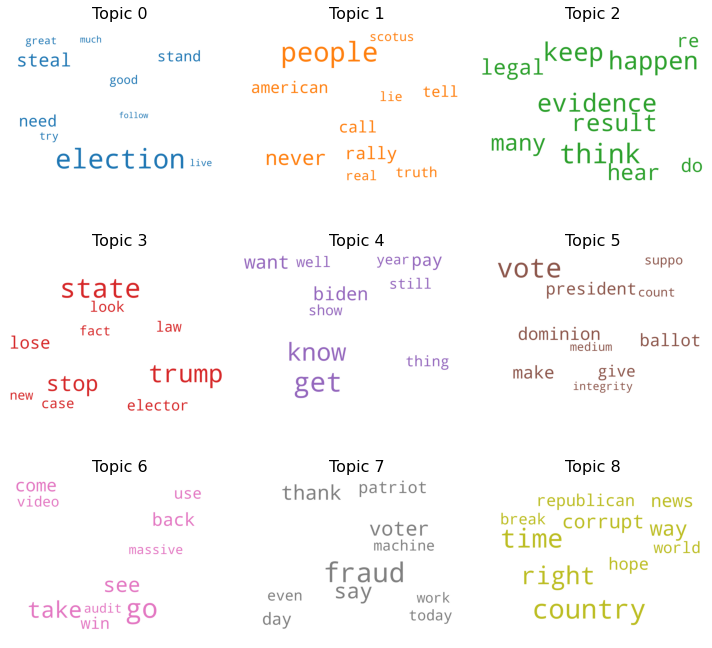

In [104]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()